<a href="https://www.kaggle.com/code/juanramirez114/notebook847be9e739?scriptVersionId=164165493" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="border-radius: 10px; border: #020000 solid; padding: 15px; background-color: #A7A5FF; font-size: 100%; text-align: left">

<h3 align="left"><font color='#001AFF'>📜 Introduction : </font></h3>
    
Customer retention is a key focus for banks in ensuring the longevity of their business. ABC Multinational Bank, in particular, is keen on retaining its account holders. The objective here is to analyze the customer data of the bank's account holders with the ultimate goal of predicting and mitigating customer churn.

Below is the customer data of account holders at ABC Multinational Bank and the aim of the data will be predicting the Customer Churn.

This dataset give information about the caracteristics of customer and if they have churned or not. The idea is study the carcateristics search what is the cause of customer churn and generate a model that will be capable of predict if one user will churn the bank.  

# <p style="border-radius: 10px; border: 4px solid #2E1A47; background-color: #A7A5FF; font-family: 'Rockwell', cursive; font-weight: bold; font-size: 125%; text-align: center; border-radius: 15px 50px; padding: 5px; box-shadow: 4px 4px 4px #556B2F; color: #001AFF;">📃Importing Libraries </p>

In [1]:
#Library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import lightgbm as lgb
from lightgbm import LGBMRegressor, LGBMClassifier, log_evaluation, early_stopping
from catboost import CatBoostRegressor, CatBoostClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, GroupKFold, train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.svm import SVR, SVC
from sklearn.ensemble import AdaBoostRegressor,AdaBoostClassifier, VotingClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import optuna

from sklearn.ensemble import VotingClassifier

<div style="border-radius:10px; border:#020000 solid; padding: 15px; background-color:  #FDF6EC; font-size:100%; text-align:left">

<h3 align="left"><font color='#11324D'>👀 Features: </font></h3>
    
This dataset is for ABC Multistate bank with following columns:

* **customer_id:** unused variable.
* **credit_score:** used as input.
* **country:** used as input.
* **gender:** used as input.
* **age:** used as input.
* **tenure:** used as input.
* **balance:** used as input.
* **products_number:** used as input.
* **credit_card:** used as input.
* **active_member:** used as input.
* **estimated_salary:** used as input.
* **churn:** used as the target. 1 if the client has left the bank during some period or 0 if he/she has not. Aim is to Predict the Customer Churn for ABC Bank.

In [2]:
train=pd.read_csv("/kaggle/input/bank-churn/train.csv")
train=train.drop("id",axis=1)
train.head(10).T

0              1          2          3  \
CustomerId             15674932       15749177   15694510   15741417   
Surname          Okwudilichukwu  Okwudiliolisa      Hsueh        Kao   
CreditScore                 668            627        678        581   
Geography                France         France     France     France   
Gender                     Male           Male       Male       Male   
Age                        33.0           33.0       40.0       34.0   
Tenure                        3              1         10          2   
Balance                     0.0            0.0        0.0  148882.54   
NumOfProducts                 2              2          2          1   
HasCrCard                   1.0            1.0        1.0        1.0   
IsActiveMember              0.0            1.0        0.0        1.0   
EstimatedSalary       181449.97        49503.5  184866.69   84560.88   
Exited                        0              0          0          0   

                         4          5          6            7          8  \
CustomerId        15766172   15771669   15692819     15669611   15691707   
Surname          Chiemenam   Genovese     Ch'ang  Chukwuebuka      Manna   
CreditScore            716        588        593          678        676   
Geography            Spain    Germany     France        Spain     France   
Gender                Male       Male     Female         Male       Male   
Age                   33.0       36.0       30.0         37.0       43.0   
Tenure                   5          4          8            1          4   
Balance                0.0  131778.58  144772.69    138476.41        0.0   
NumOfProducts            2          1          1            1          2   
HasCrCard              1.0        1.0        1.0          1.0        1.0   
IsActiveMember         1.0        0.0        0.0          0.0        0.0   
EstimatedSalary   15068.83  136024.31   29792.11     106851.6  142917.13   
Exited                   0          1          0            0          0   

                         9  
CustomerId        15591721  
Surname           Cattaneo  
CreditScore            583  
Geography          Germany  
Gender                Male  
Age                   40.0  
Tenure                   4  
Balance           81274.33  
NumOfProducts            1  
HasCrCard              1.0  
IsActiveMember         1.0  
EstimatedSalary  170843.07  
Exited                   0

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerId       165034 non-null  int64  
 1   Surname          165034 non-null  object 
 2   CreditScore      165034 non-null  int64  
 3   Geography        165034 non-null  object 
 4   Gender           165034 non-null  object 
 5   Age              165034 non-null  float64
 6   Tenure           165034 non-null  int64  
 7   Balance          165034 non-null  float64
 8   NumOfProducts    165034 non-null  int64  
 9   HasCrCard        165034 non-null  float64
 10  IsActiveMember   165034 non-null  float64
 11  EstimatedSalary  165034 non-null  float64
 12  Exited           165034 non-null  int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 16.4+ MB


In [4]:
train.describe()

CustomerId    CreditScore            Age         Tenure  \
count  1.650340e+05  165034.000000  165034.000000  165034.000000   
mean   1.569201e+07     656.454373      38.125888       5.020353   
std    7.139782e+04      80.103340       8.867205       2.806159   
min    1.556570e+07     350.000000      18.000000       0.000000   
25%    1.563314e+07     597.000000      32.000000       3.000000   
50%    1.569017e+07     659.000000      37.000000       5.000000   
75%    1.575682e+07     710.000000      42.000000       7.000000   
max    1.581569e+07     850.000000      92.000000      10.000000   

             Balance  NumOfProducts      HasCrCard  IsActiveMember  \
count  165034.000000  165034.000000  165034.000000   165034.000000   
mean    55478.086689       1.554455       0.753954        0.497770   
std     62817.663278       0.547154       0.430707        0.499997   
min         0.000000       1.000000       0.000000        0.000000   
25%         0.000000       1.000000       1.000000        0.000000   
50%         0.000000       2.000000       1.000000        0.000000   
75%    119939.517500       2.000000       1.000000        1.000000   
max    250898.090000       4.000000       1.000000        1.000000   

       EstimatedSalary         Exited  
count    165034.000000  165034.000000  
mean     112574.822734       0.211599  
std       50292.865585       0.408443  
min          11.580000       0.000000  
25%       74637.570000       0.000000  
50%      117948.000000       0.000000  
75%      155152.467500       0.000000  
max      199992.480000       1.000000

In [5]:
train.duplicated().any()

False

<div style="border-radius:10px; border:#65647C solid; padding: 15px; background-color: #F8EDE3; font-size:100%; text-align:left">

<h3 align="left"><font color='#7D6E83'><b>🗨️ Comment: </b></font></h3>

* As seen, there are no missing or duplicate data, there are 3 string and 10 number data, and the data have diferents number values, fot that it's necesary transform and normalizate.

# <p style="border-radius: 10px; border: 4px solid #020000; background-color: #A7A5FF; font-family: 'Rockwell', cursive; font-weight: bold; font-size: 125%; text-align: center; border-radius: 15px 50px; padding: 5px; box-shadow: 4px 4px 4px #556B2F; color: #001AFF;">🖼️ Exploratory Data Analysis (EDA) 🖼️</p>

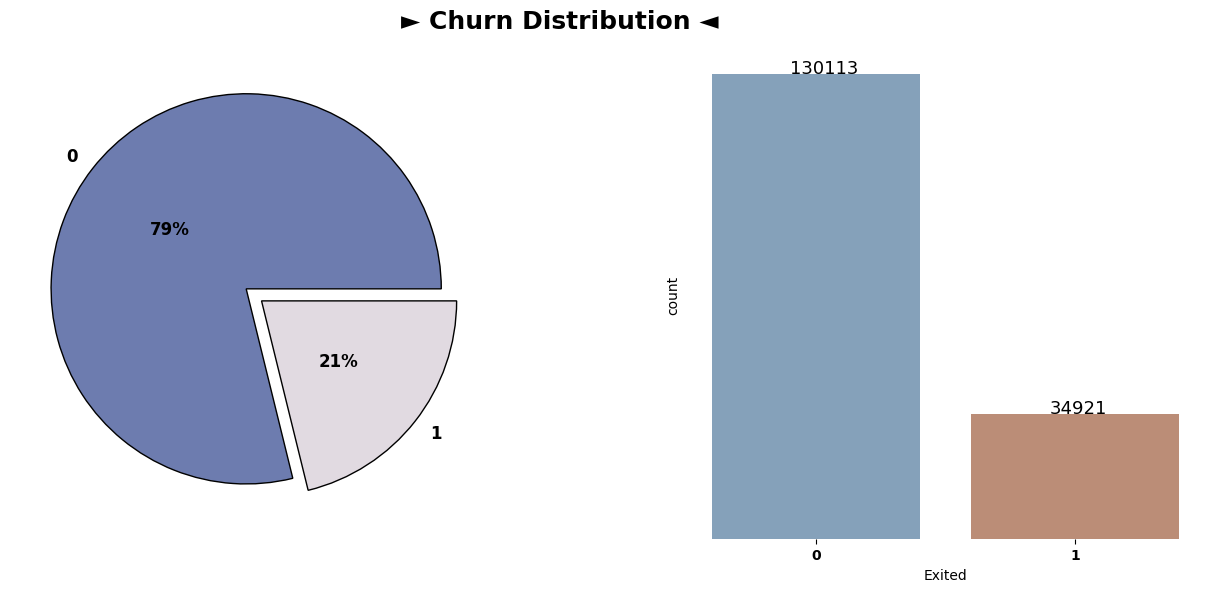

In [6]:
def plot_target(df: pd.DataFrame, col: str, title: str, pie_colors:list) -> None:
    
    fig, ax = plt.subplots(1,2,figsize=(15, 6), width_ratios=[2,1])

    textprops={'fontsize': 12, 'weight': 'bold',"color": "black"}
    
    ax[0].pie(df[col].value_counts().to_list(),
            colors=pie_colors,
            labels=df[col].value_counts().index.to_list(),
            autopct='%1.f%%', 
            explode=([.05]*df[col].nunique()),
            pctdistance=0.5,
            wedgeprops={'linewidth' : 1, 'edgecolor' : 'black'}, 
            textprops=textprops)

    sns.countplot(x = col, data=df, palette = "twilight_shifted", order=df[col].value_counts().to_dict().keys())
    
    for p, count in enumerate(df[col].value_counts().to_dict().values(),0):
        
        ax[1].text(p-0.1, count+(np.sqrt(count)), count, color='black', fontsize=13)
        
    plt.setp(ax[1].get_xticklabels(), fontweight="bold")
    plt.yticks([])
    plt.box(False)
    fig.suptitle(x=0.56, t=f'► {title} Distribution ◄', fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.show()
plot_target(train, 
            col="Exited", 
            title="Churn", 
            pie_colors=["#6d7caf","#e1dae1","#a6615e","#d3c3f7","#f3f3af","#c0ebe9"])

## 1. Is there a relationship between age, gender and Exited of a Customer of bank?

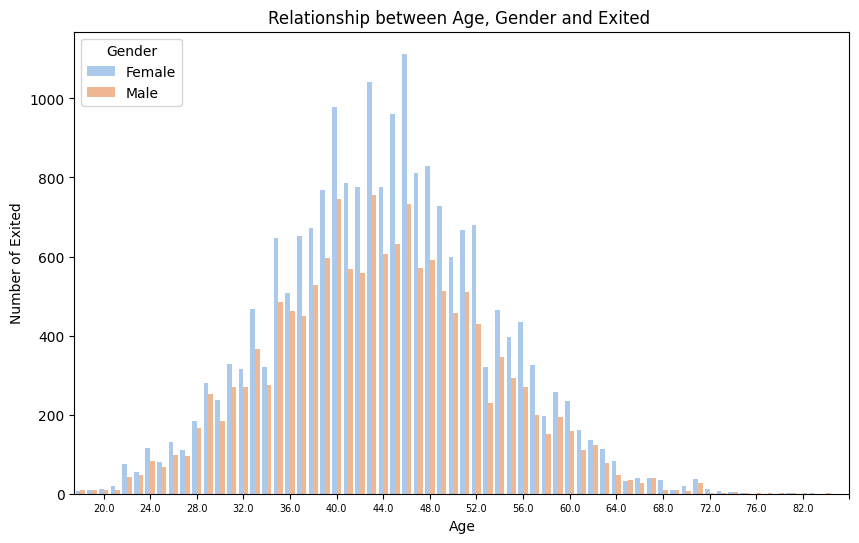

In [7]:
Exited=train[train.Exited==1]
Relationship=Exited.groupby("Gender")["Age"].value_counts().reset_index().sort_values(by="count",ascending=False)
Relationship
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='count', hue='Gender', data=Relationship, palette='pastel')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Number of Exited')
plt.title('Relationship between Age, Gender and Exited ')
plt.xticks(np.arange(2,70,4),rotation=0, fontsize=7)

# Show the plot
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

Text(0.5, 1.0, 'Relationship between Age, Gender and Customer who remain')

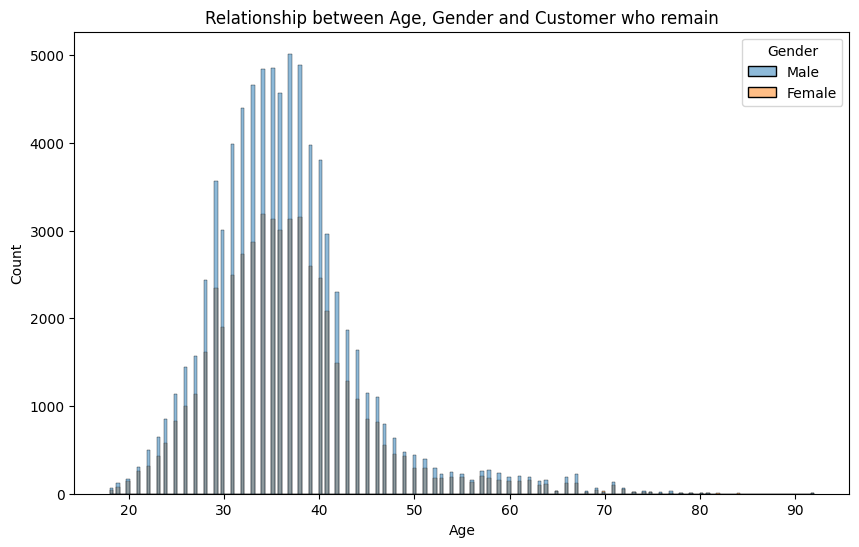

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(train[train["Exited"]==0],x="Age",hue="Gender")
plt.title("Relationship between Age, Gender and Customer who remain")

## 2. How many percentage male and female were exited in the given dataset?

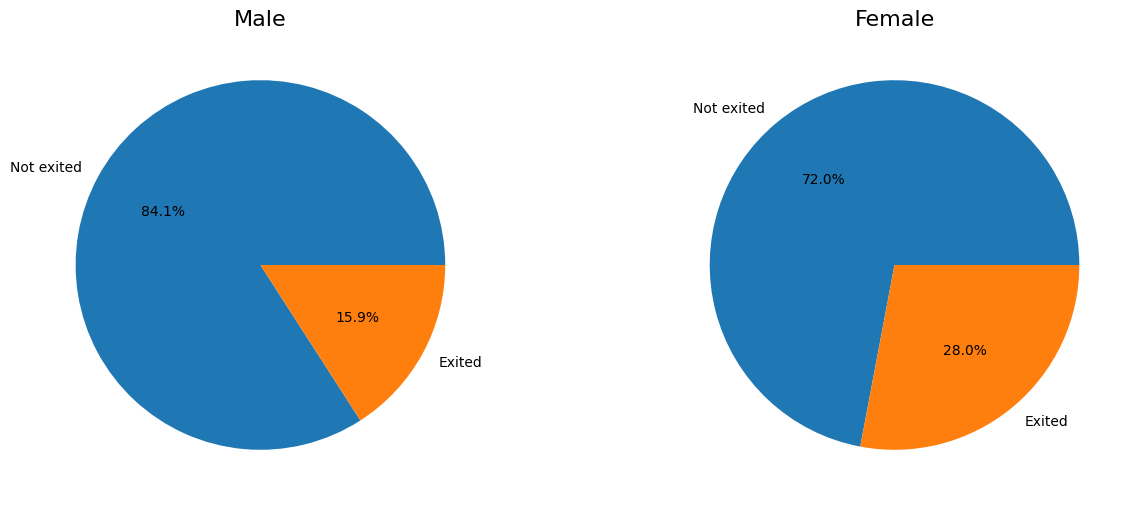

In [9]:
M=train[train["Gender"]=="Male"].Exited.value_counts()
Mf=train[train["Gender"]=="Female"].Exited.value_counts()
fig, ax = plt.subplots(1,2,figsize=(15, 6), width_ratios=[2,2])
ax[0].set_title("Male",fontsize=16)
a=ax[0].pie(M/sum(M)*100,labels=["Not exited", "Exited"],autopct="%.1f%%")
ax[1].set_title("Female",fontsize=16)
a=ax[1].pie(Mf/sum(Mf)*100,labels=["Not exited", "Exited"],autopct="%.1f%%")

## 3. how is the relationship between Age, gender and Exited, but if analice the percentage the exited for age?

In [10]:
def percentageAge(x):
    y=train.groupby("Gender")["Age"].value_counts().reset_index()
    z=y[(y["Age"]==x.Age)*(y["Gender"]==x.Gender)]
    return 100*x["count"]/z.to_numpy()[0][2]

Exited=train[train.Exited==1]
Relationship=Exited.groupby("Gender")["Age"].value_counts().reset_index()
Relationship["Percentage"]=Relationship.apply(percentageAge,axis=1)
                            

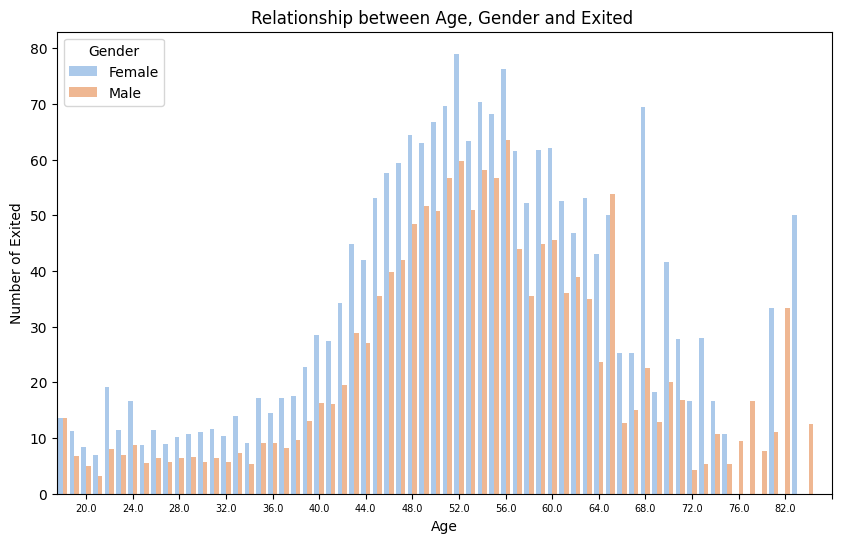

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Percentage', hue='Gender', data=Relationship, palette='pastel')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Number of Exited')
plt.title('Relationship between Age, Gender and Exited ')
plt.xticks(np.arange(2,70,4),rotation=0, fontsize=7)

# Show the plot
plt.show()

## 4. How are the porcentual proportion between male and female?

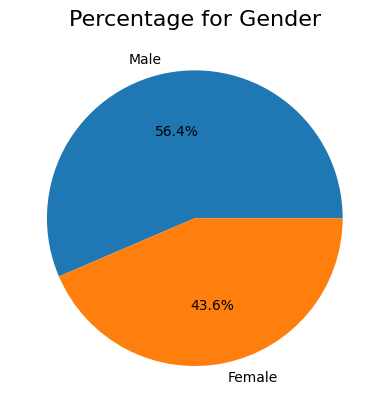

In [12]:
M=train.Gender.value_counts()
plt.title("Percentage for Gender",fontsize=16)
a=plt.pie(M/sum(M)*100,labels=["Male", "Female"],autopct="%.1f%%")

<div style="border-radius:10px; border:#65647C solid; padding: 15px; background-color: #F8EDE3; font-size:100%; text-align:left">

<h3 align="left"><font color='#7D6E83'><b>🗨️ Comment: </b></font></h3>

* As can look, the age have incidence in the customer exited, it is more likely that old people exited and the likely increased between 44 to 64 age. Also, we can look that the age and gender there aren't relationship, but female have more likely of exited without age import.  

## 5. Is there relationship between exited and credit score? 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

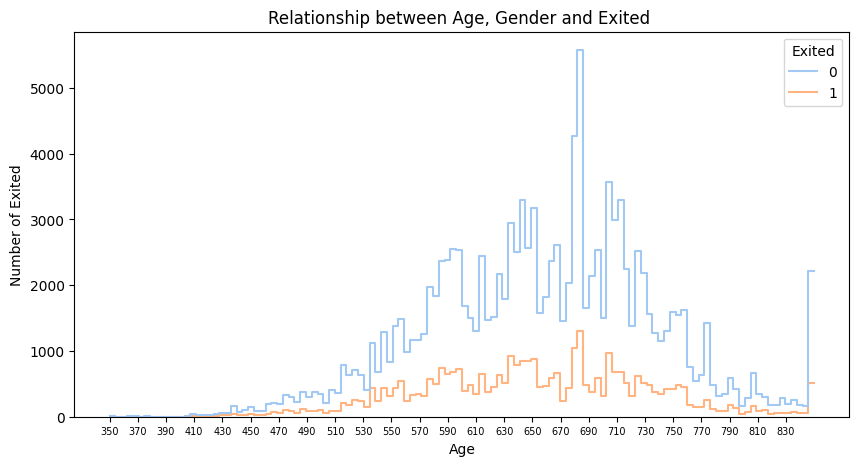

In [13]:
plt.figure(figsize=(10, 5))
sns.histplot(x='CreditScore', hue='Exited', data=train, palette='pastel',element="step", fill=False)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Number of Exited')
plt.title('Relationship between Age, Gender and Exited ')
plt.xticks(np.arange(350,850,20),rotation=0, fontsize=7)

# Show the plot
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='CreditScore', ylabel='Density'>

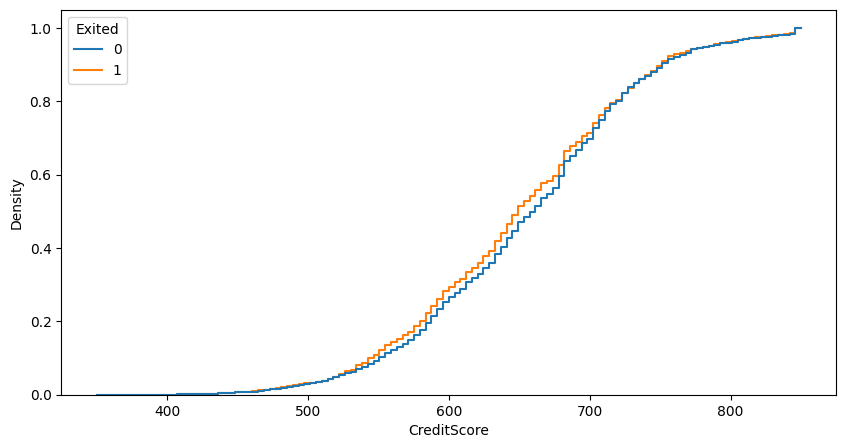

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(
    train,x='CreditScore', hue='Exited', element="step", fill=False,
    cumulative=True, stat="density", common_norm=False,
)

## 6. Is there relationship between tenure, products number and Exited?

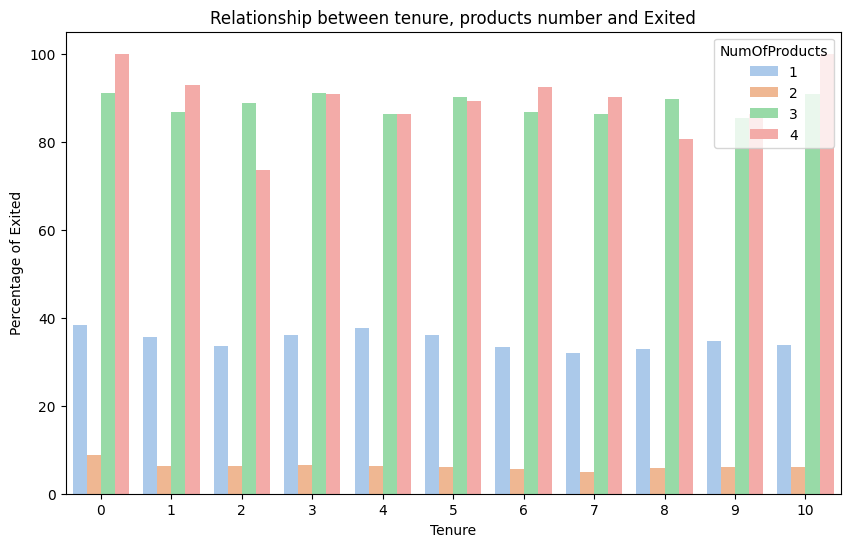

In [15]:
def percentageTenure(x):
    y=train.groupby("NumOfProducts")["Tenure"].value_counts().reset_index()
    z=y[(y["NumOfProducts"]==x.NumOfProducts)*(y["Tenure"]==x.Tenure)]
    return 100*x["count"]/z.to_numpy()[0][2]

Exited=train[train.Exited==1]
Relationship=Exited.groupby("NumOfProducts")["Tenure"].value_counts().reset_index().sort_values(by="count",ascending=False)
Relationship["Percentage"]=Relationship.apply(percentageTenure,axis=1)
plt.figure(figsize=(10, 6))
sns.barplot(x='Tenure', y='Percentage', hue='NumOfProducts', data=Relationship, palette='pastel')

# Add labels and title
plt.xlabel('Tenure')
plt.ylabel('Percentage of Exited')
plt.title('Relationship between tenure, products number and Exited')

# Show the plot
plt.show()

## 7. The customer exit dependece of number of products? what is the amount ideal for keep the customer? 

In [16]:
Numproduct_exited=train.groupby(["NumOfProducts","Exited"])['CustomerId'].count().reset_index()
tabla=pd.pivot_table(Numproduct_exited, values='CustomerId', index='NumOfProducts', columns='Exited')
sumtabl=tabla.sum(axis=1)
tabla[0]=100*tabla[0]/sumtabl
tabla[1]=100*tabla[1]/sumtabl
tabla

Exited                 0          1
NumOfProducts                      
1              65.288081  34.711919
2              93.957837   6.042163
3              11.748445  88.251555
4              12.421053  87.578947

## 8. what's te relationship between numbers of products and tenure, while more tenure more products or no depends? 

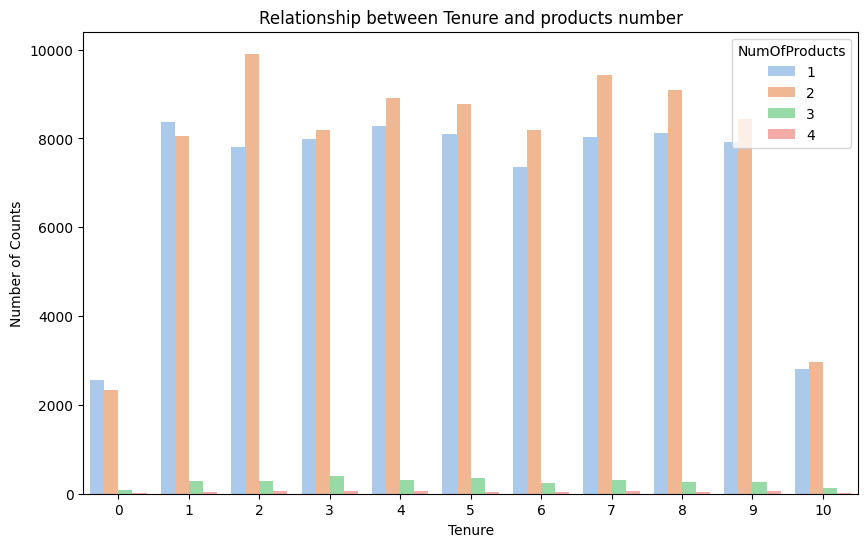

In [17]:
Relationship=train.groupby("NumOfProducts")["Tenure"].value_counts().reset_index().sort_values(by="count",ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Tenure', y='count', hue='NumOfProducts', data=Relationship, palette='pastel')

# Add labels and title
plt.xlabel('Tenure')
plt.ylabel('Number of Counts')
plt.title('Relationship between Tenure and products number')

# Show the plot
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='Tenure', ylabel='Density'>

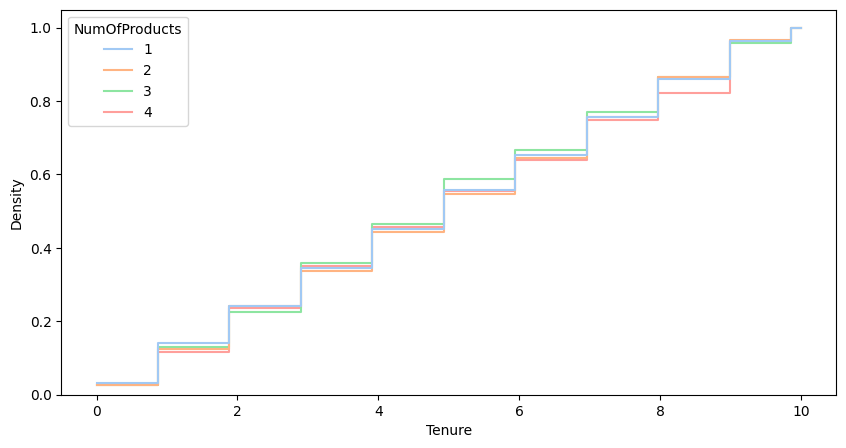

In [18]:
plt.figure(figsize=(10, 5))
sns.histplot(
        train,x='Tenure', hue='NumOfProducts', element="step", fill=False,
    cumulative=True, stat="density", common_norm=False,palette='pastel'
)

## 9. How is distributed the country of the customer and exited customer ?

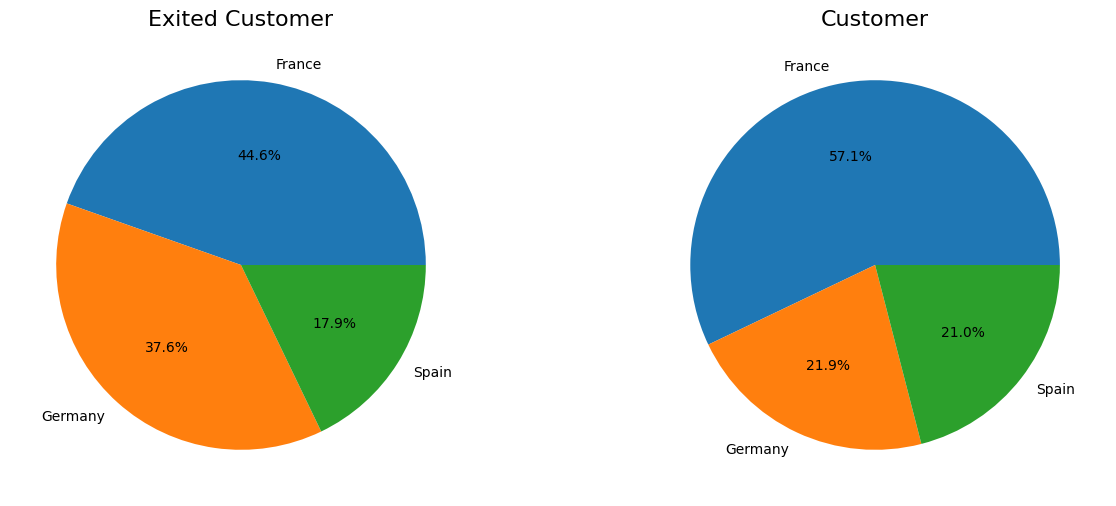

In [19]:
fig, ax = plt.subplots(1,2,figsize=(15, 6), width_ratios=[2,2])
ax[0].set_title("Exited Customer",fontsize=16)
a=ax[0].pie(100*Exited.Geography.value_counts()/len(Exited),labels=["France", "Germany","Spain"],autopct="%.1f%%")
ax[1].set_title("Customer",fontsize=16)
a=ax[1].pie(100*train.Geography.value_counts()/len(train),labels=["France", "Germany","Spain"],autopct="%.1f%%")


## 10. The dependency from Exited of Country of customer is why the Germany people exited more or why? I will analized relationship between geography and Age, products_number.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

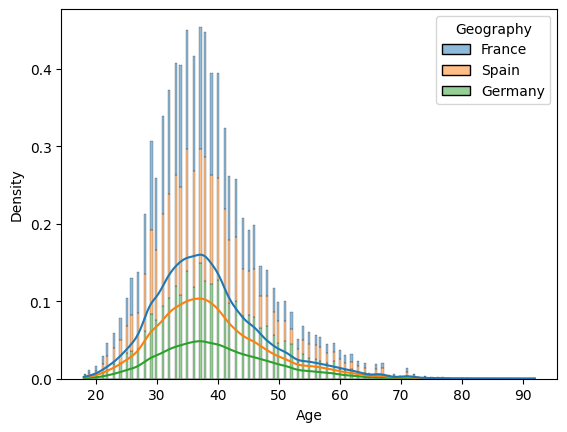

In [20]:
a=sns.histplot(train,x="Age",hue="Geography",multiple="stack", kde=True,
    stat="density", common_norm=False)

<Axes: xlabel='Age', ylabel='Geography'>

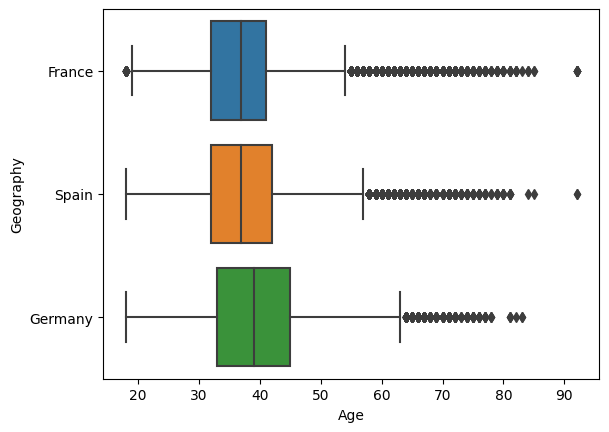

In [21]:
sns.boxplot(train, x="Age",y="Geography")

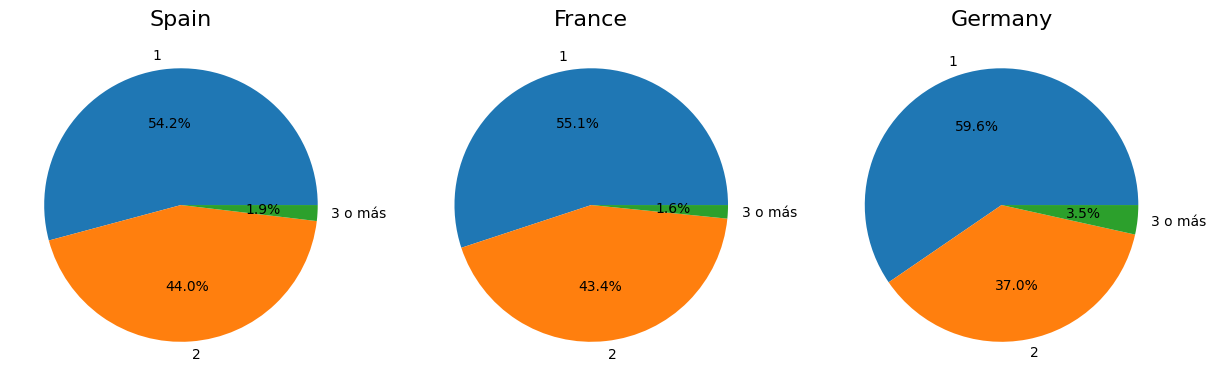

In [22]:
fig, ax = plt.subplots(1,3,figsize=(15, 6), width_ratios=[2,2,2])
traincop=train.copy()
traincop["NumOfProducts"]=traincop.NumOfProducts.map({1:'1',2:'2',3:'3 o más',4:'3 o más'})
for j,i in enumerate(["Spain","France","Germany"]):
    ax[j].set_title(i,fontsize=16)
    a=ax[j].pie(100*traincop[traincop.Geography==i].NumOfProducts.value_counts()/len(traincop[traincop.Geography==i]),labels=[1,2,'3 o más'],autopct="%.1f%%")


## 11. Is there relationship between Exited and EstimatedSalary or Balance?

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

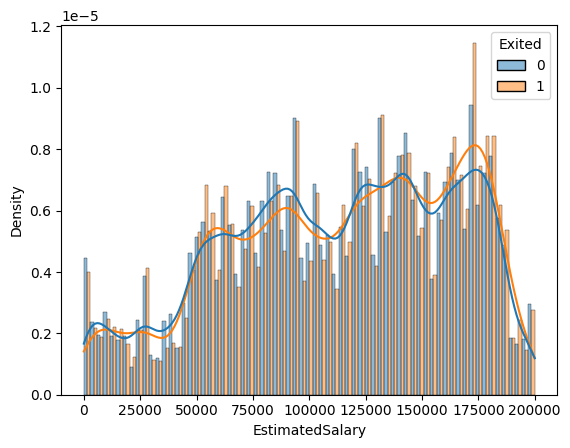

In [23]:
sns.histplot(train,x="EstimatedSalary",hue="Exited", multiple="dodge",stat="density",kde=True, common_norm=False)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

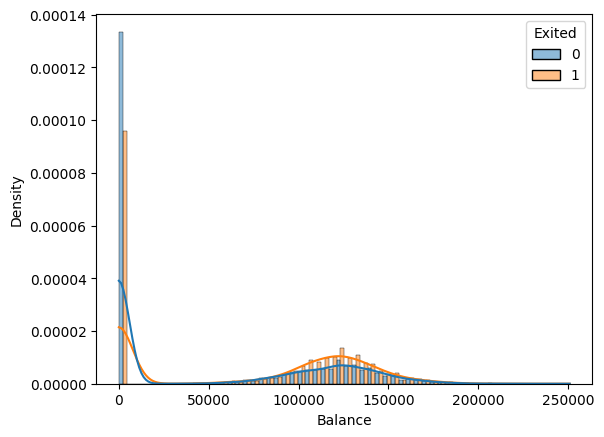

In [24]:
sns.histplot(train,x="Balance",hue="Exited", multiple="dodge",stat="density",kde=True, common_norm=False )
plt.show()

## 12. In balance histplot we can look that for balance equal to cero the customers that remain are higher while that for the others values of balance it's higher for the exited customers, What happen?

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

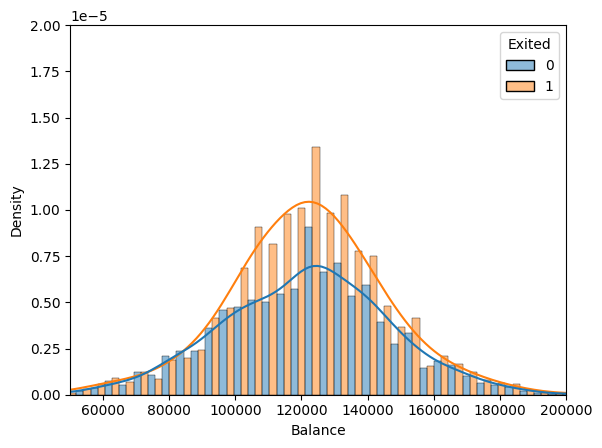

In [25]:
sns.histplot(train,x="Balance",hue="Exited", multiple="dodge",stat="density",kde=True, common_norm=False, )
plt.xlim(50000,200000)
plt.ylim(0,0.00002)
plt.show()

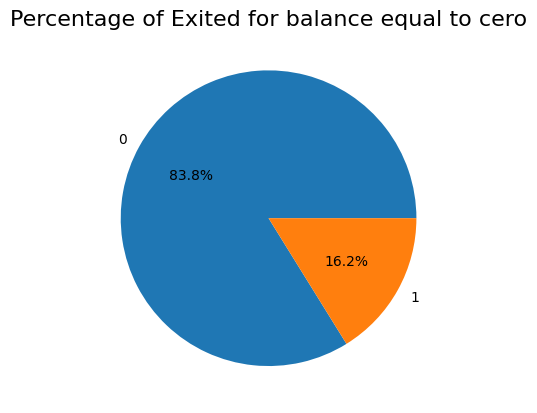

In [26]:
a=train[train.Balance==0].Exited.value_counts()
M=a*100/sum(a)
plt.title("Percentage of Exited for balance equal to cero",fontsize=16)
a=plt.pie(M/sum(M)*100,labels=["0", "1"],autopct="%.1f%%")

## 13. Can affect they haven't a credit card in the decision of churn?

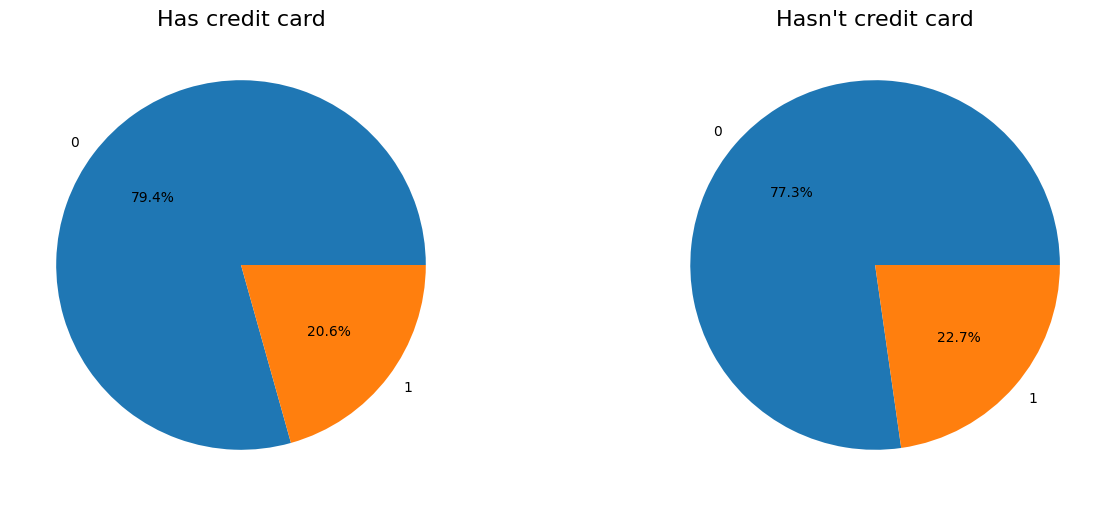

In [27]:
fig, ax = plt.subplots(1,2,figsize=(15, 6), width_ratios=[2,2])
ax[0].set_title("Has credit card",fontsize=16)
a=ax[0].pie(100*train[train.HasCrCard==1].Exited.value_counts()/len(train[train.HasCrCard==1]),labels=[0,1],autopct="%.1f%%")
ax[1].set_title("Hasn't credit card",fontsize=16)
a=ax[1].pie(100*train[train.HasCrCard==0].Exited.value_counts()/len(train[train.HasCrCard==0]),labels=[0,1],autopct="%.1f%%")

## 14. Is there relationship between they are active member and churn the bank?

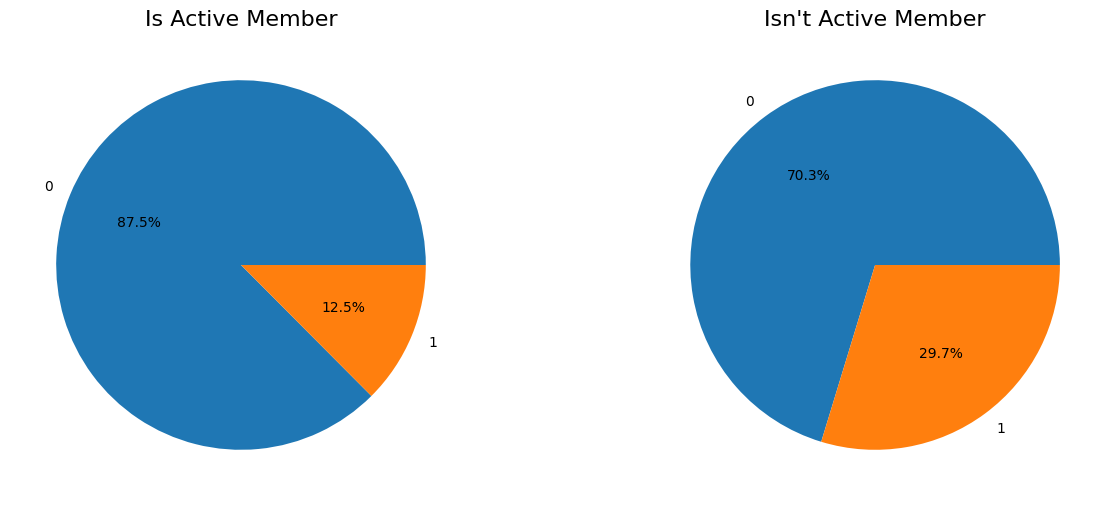

In [28]:
fig, ax = plt.subplots(1,2,figsize=(15, 6), width_ratios=[2,2])
ax[0].set_title("Is Active Member",fontsize=16)
a=ax[0].pie(100*train[train.IsActiveMember==1].Exited.value_counts()/len(train[train.IsActiveMember==1]),labels=[0,1],autopct="%.1f%%")
ax[1].set_title("Isn't Active Member",fontsize=16)
a=ax[1].pie(100*train[train.IsActiveMember==0].Exited.value_counts()/len(train[train.IsActiveMember==0]),labels=[0,1],autopct="%.1f%%")

## 15. Is there relationship between they are active member and age of the customer? 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

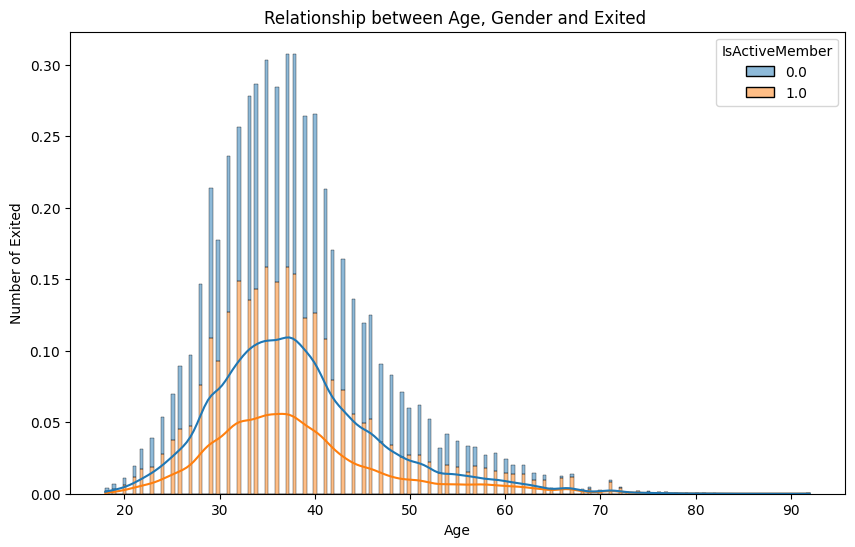

In [29]:
plt.figure(figsize=(10, 6))
a=sns.histplot(train,x="Age",hue="IsActiveMember",multiple="stack", kde=True,
    stat="density", common_norm=False)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Number of Exited')
plt.title('Relationship between Age, Gender and Exited ')

# Show the plot
plt.show()

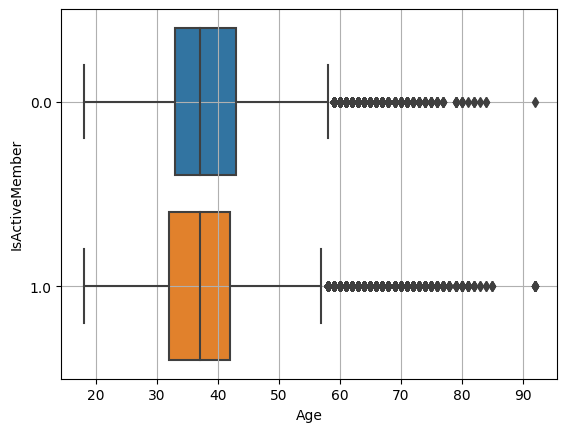

In [30]:
traincop=train.copy()
traincop.IsActiveMember=traincop.IsActiveMember.astype("str")
sns.boxplot(traincop, x="Age",y="IsActiveMember")
plt.grid()

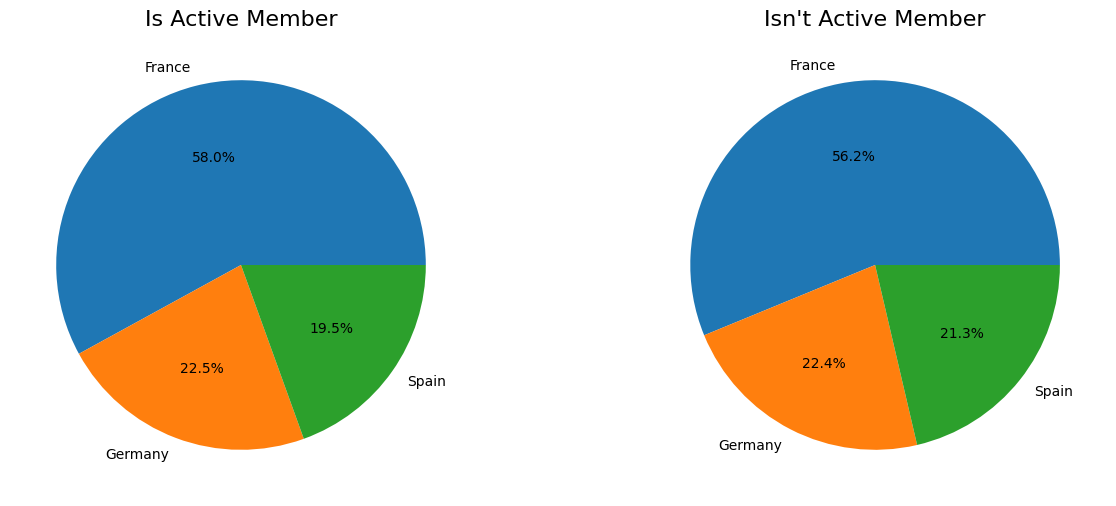

In [31]:
fig, ax = plt.subplots(1,2,figsize=(15, 6), width_ratios=[2,2])
ax[0].set_title("Is Active Member",fontsize=16)
a=ax[0].pie(100*train[train.IsActiveMember==1].Geography.value_counts()/len(train[train.IsActiveMember==1]),labels=["France", "Germany","Spain"],autopct="%.1f%%")
ax[1].set_title("Isn't Active Member",fontsize=16)
a=ax[1].pie(100*train[train.IsActiveMember==0].Geography.value_counts()/len(train[train.IsActiveMember==0]),labels=["France", "Germany","Spain"],autopct="%.1f%%")

## 16. Though we doesn't find any correlation between continuous variables, we'll use the matrix of correlation for we find any correlation that we have didn't view .

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

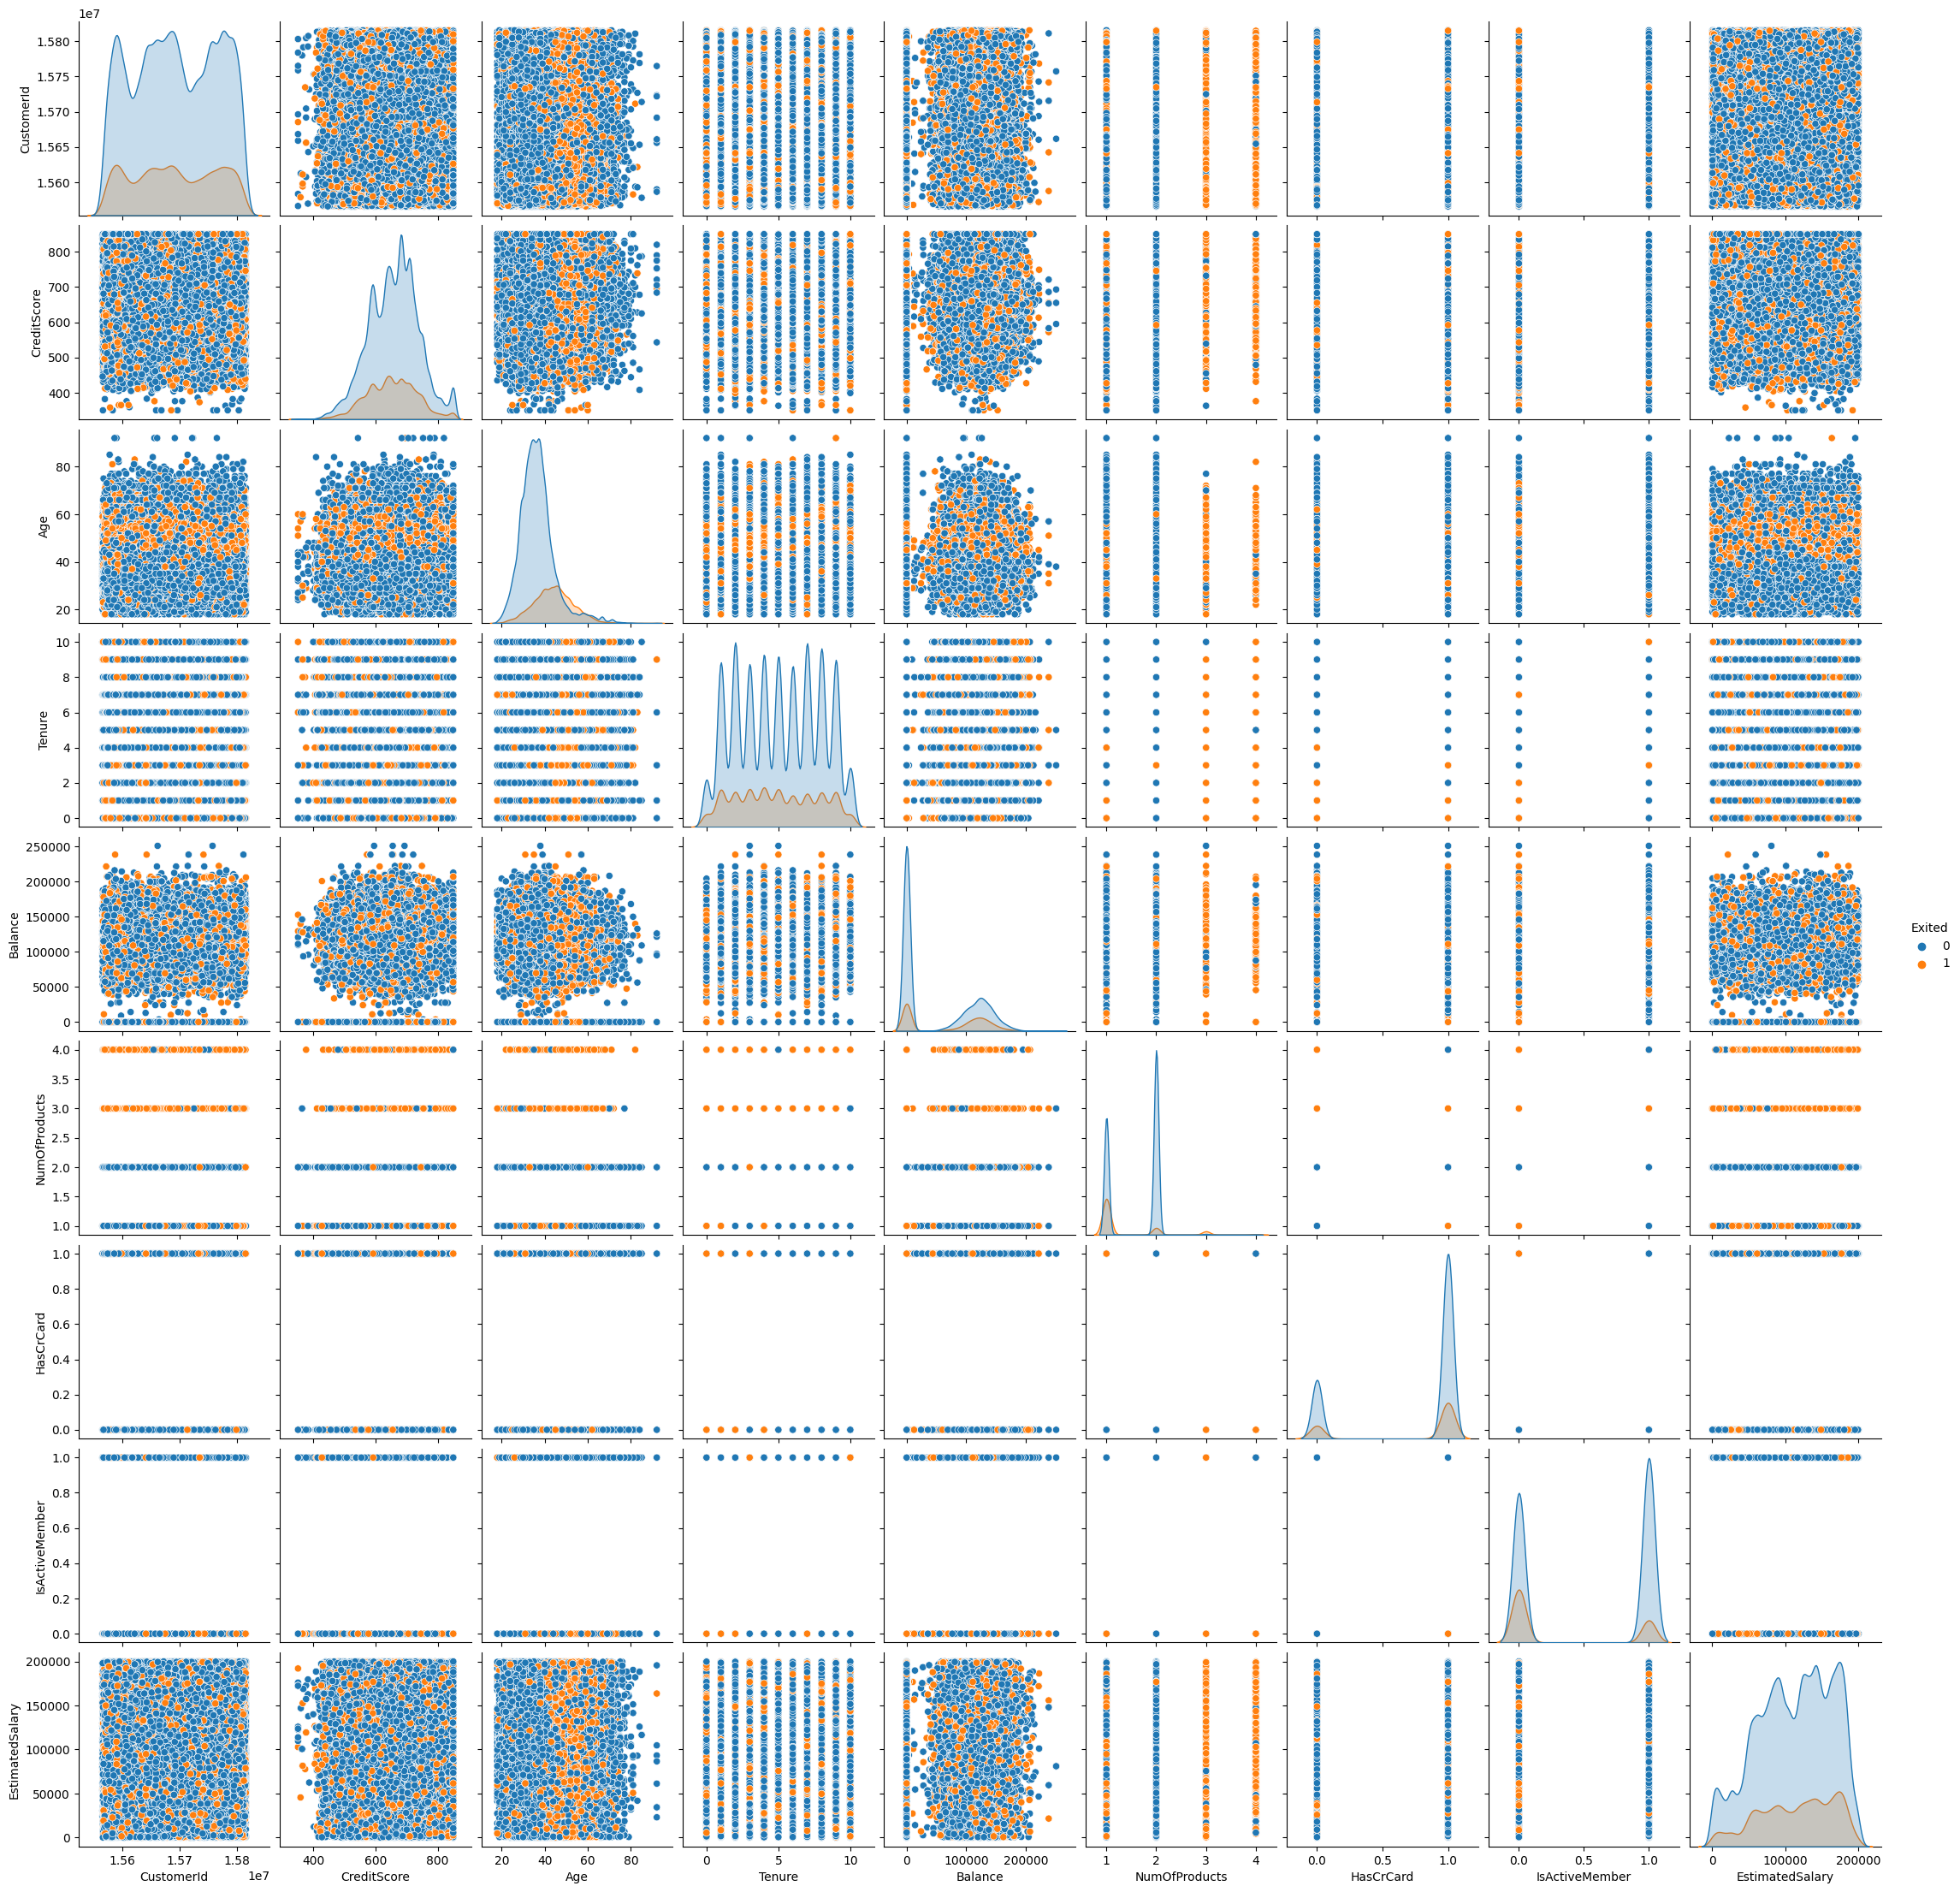

In [32]:
sns.pairplot(train, hue="Exited")

<Axes: >

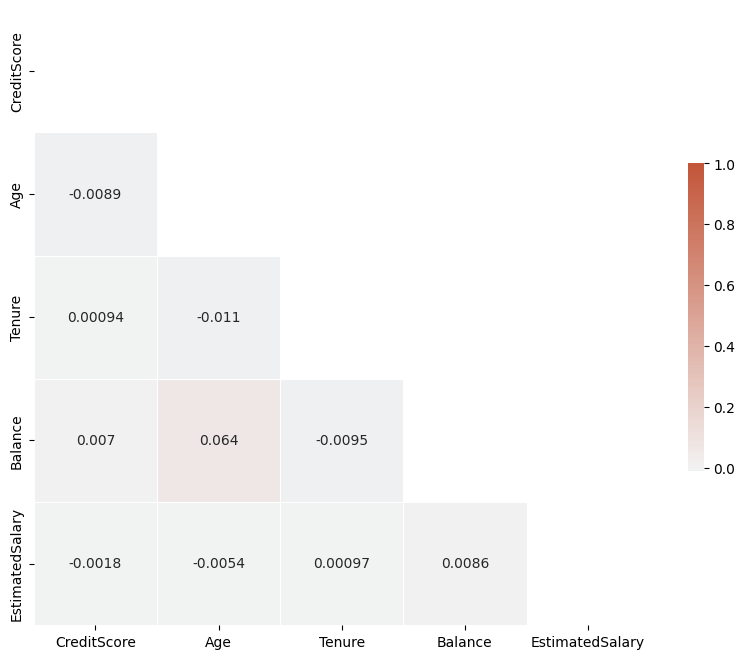

In [33]:
corr = train[[ 'CreditScore',  'Age',
       'Tenure', 'Balance', 
       'EstimatedSalary']].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

<div style="border-radius:10px; border:#020000 solid; padding: 15px; background-color:  #FDF6EC; font-size:100%; text-align:left">

<h3 align="left"><font color='#11324D'>📚 EDA Conclutions 🤔 </font></h3>
     
From EDA that we did, we can do the following conclusions: 
* The 21 % of data correspond to exited and 79% to not exited, for  is necessary we have that consider when we  do the model that the training it has lower knowleg of exited case.  

* The Age, gender, Number of products, Balance and be active member have a direct influences about customer churn.

*   The age have incidence in the customer exited, it is more likely that old people exited and the likely increased between 44 to 64 age.

* It's more likely that a female churn the bank than male.

* Curiosly if a customer has 3 or 4 products is very likely that churn the bank whitout import their tenure. If he has 2 products is low likely that churn but if has 1 product the likely increase in 28 % in comparation with he has 2 products. For that is advisable that customers has 2 products for remain.  

* Apparently, the country of customer affect the churn, however, when we saw  the proportion of age and products number we can see that in germany there are more  peopple that churn because the customers are more old and have more 1, 3 or 4 products than the others countrys.
Therefore is probably that the efects of country in the churn exit but is more likely that are for age and number of products.

*  As we could show , the balance are relationship with exited given that for balance equal to cero is more likely that people remain and when the balance is mayor than cero is more likely that the customer churn.

* Also, we noted that if the customer  isn't active member is more likely that exited than if is active member.

*  Finally, we saw that there aren't correlation between features.
    

# <p style="border-radius: 10px; border: 4px solid #2E1A47; background-color: #A7A5FF; font-family: 'Rockwell', cursive; font-weight: bold; font-size: 125%; text-align: center; border-radius: 15px 50px; padding: 5px; box-shadow: 4px 4px 4px #556B2F; color: #001AFF;"> 🕸️​🔱​ Clustering 🌌​🌠​ </p>

In [34]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


!pip install -q trimap
import trimap

import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs , init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


In [35]:
trainCl=train.drop(['CustomerId', 'Surname','Exited'],axis=1)
trainCl['Gender']=pd.factorize(trainCl['Gender'])[0]
trainCl['Geography']=pd.factorize(trainCl['Geography'])[0]
trainCl['Geography']=pd.factorize(trainCl['Geography'])[0]
trainCl

CreditScore  Geography  Gender   Age  Tenure    Balance  \
0               668          0       0  33.0       3       0.00   
1               627          0       0  33.0       1       0.00   
2               678          0       0  40.0      10       0.00   
3               581          0       0  34.0       2  148882.54   
4               716          1       0  33.0       5       0.00   
...             ...        ...     ...   ...     ...        ...   
165029          667          1       1  33.0       2       0.00   
165030          792          0       0  35.0       3       0.00   
165031          565          0       0  31.0       5       0.00   
165032          554          1       1  30.0       7  161533.00   
165033          850          0       0  31.0       1       0.00   

        NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0                   2        1.0             0.0        181449.97  
1                   2        1.0             1.0         49503.50  
2                   2        1.0             0.0        184866.69  
3                   1        1.0             1.0         84560.88  
4                   2        1.0             1.0         15068.83  
...               ...        ...             ...              ...  
165029              1        1.0             1.0        131834.75  
165030              1        0.0             0.0        131834.45  
165031              1        1.0             1.0        127429.56  
165032              1        0.0             1.0         71173.03  
165033              1        1.0             0.0         61581.79  

[165034 rows x 10 columns]

In [36]:
from sklearn.ensemble import IsolationForest
Isf = IsolationForest(contamination='auto')
trainCl.loc[:,'Outliers'] = Isf.fit_predict(trainCl)

num_outliers = trainCl.loc[trainCl['Outliers'] == -1].shape[0]
print(num_outliers)

97951


In [37]:
#calculating the percentage of outliers value in Train dataset
trainCl['Outliers'].value_counts(normalize=True)

Outliers
-1    0.59352
 1    0.40648
Name: proportion, dtype: float64

In [38]:
import umap
# Umap
#squishing all the features into two columns
model = umap.UMAP(random_state=42)
train_umap_embeddings = model.fit_transform(trainCl)

Kmeans = KMeans(n_clusters=8, random_state=42, n_init="auto").fit(train_umap_embeddings)
cluster_ids = Kmeans.labels_

2024-02-24 20:55:07.860108: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-24 20:55:07.860315: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-24 20:55:08.002656: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

/opt/conda/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



In [39]:
trainUmap = pd.DataFrame(train_umap_embeddings)
trainUmap.columns = ['col1', 'col2']
trainUmap['cluster_ids'] = cluster_ids
trainUmap['Exited'] = train['Exited']

In [40]:
! pip install pacmap

In [41]:
import pacmap
trainCl_numpy = trainCl.values
trainCl_numpy = trainCl_numpy.reshape(trainCl.shape[0], -1)
train2 = train.copy()
y = train2['Exited'].values

pacmap_emb = pacmap.PaCMAP(n_components=2, n_neighbors=None, MN_ratio=0.5, FP_ratio=4.0) 

# # fit the data (The index of transformed data corresponds to the index of the original data)
train_PacMap_embedding = pacmap_emb.fit_transform(trainCl_numpy, init="pca")

In [42]:
Kmeans = KMeans(n_clusters=8, random_state=42, n_init="auto").fit(train_PacMap_embedding)
cluster_ids = Kmeans.labels_

train_PacMap = pd.DataFrame(train_PacMap_embedding)
train_PacMap.columns = ['col1', 'col2']
train_PacMap['cluster_ids'] = cluster_ids
train_PacMap['Exited'] = train['Exited']
train_PacMap

col1       col2  cluster_ids  Exited
0       -0.219835 -34.215706            4       0
1      -35.962845  20.915215            5       0
2      -21.939596 -34.780567            1       0
3       27.679657  10.569871            3       0
4       -1.433243  29.770468            7       0
...           ...        ...          ...     ...
165029  -9.577352  -4.008025            2       0
165030  -9.195732  -4.085727            2       0
165031 -41.147594  -3.501471            5       0
165032  28.963615  15.572869            3       0
165033  -0.726385  19.514597            7       1

[165034 rows x 4 columns]

In [43]:
trainCl_numpy = trainCl.values
trimap_emb = trimap.TRIMAP(verbose=False, n_inliers=5, n_outliers=7, n_random=12)
trimap_embedding = trimap_emb.fit_transform(trainCl_numpy)

In [44]:
train_TRImap = pd.DataFrame(trimap_embedding)
train_TRImap.columns = ['col1','col2']
train_TRImap['cluster_ids'] = cluster_ids
train_TRImap['Exited'] = train['Exited']

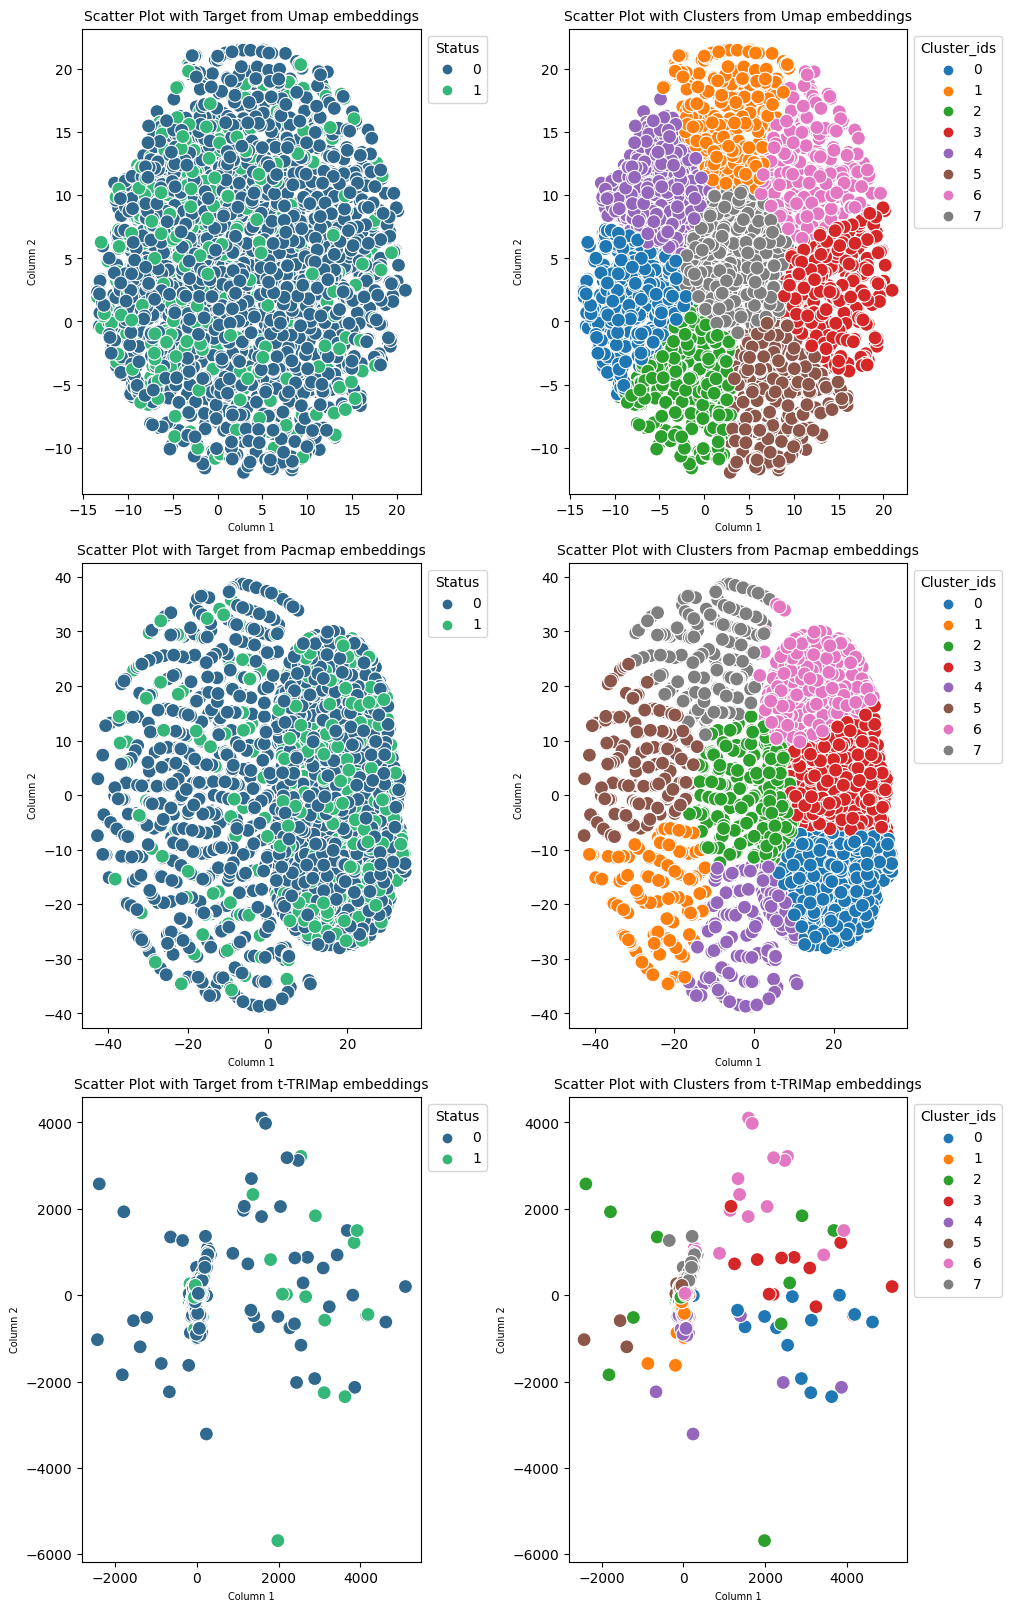

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [45]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 16), constrained_layout=True)

# Flatten the 2x2 array of axes for easier indexing
axes = axes.flatten()

# Umap plot
# plt.figure(figsize=(8, 6))
sns.scatterplot(x='col1', y='col2', hue='Exited', data=trainUmap.iloc[:5000], palette='viridis', s=100, ax=axes[0])

# Add labels and title
axes[0].set_xlabel('Column 1',fontsize=7)
axes[0].set_ylabel('Column 2',fontsize=7)
axes[0].set_title('Scatter Plot with Target from Umap embeddings', fontsize=10)

axes[0].legend(title='Status', loc='upper left', bbox_to_anchor=(1, 1))

# Umap plot
sns.scatterplot(x='col1', y='col2', hue='cluster_ids', data=trainUmap.iloc[:5000], palette='tab10', s=100, ax=axes[1])

# Add labels and title
axes[1].set_xlabel('Column 1',fontsize=7)
axes[1].set_ylabel('Column 2',fontsize=7)
axes[1].set_title('Scatter Plot with Clusters from Umap embeddings', fontsize=10)

axes[1].legend(title='Cluster_ids', loc='upper left', bbox_to_anchor=(1, 1))

# PacMap plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='col1', y='col2', hue='Exited', data=train_PacMap.iloc[:5000], palette='viridis', s=100, ax=axes[2])

# Add labels and title
axes[2].set_xlabel('Column 1',fontsize=7)
axes[2].set_ylabel('Column 2',fontsize=7)
axes[2].set_title('Scatter Plot with Target from Pacmap embeddings', fontsize=10)

axes[2].legend(title='Status', loc='upper left', bbox_to_anchor=(1, 1))

# PacMap plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='col1', y='col2', hue='cluster_ids', data=train_PacMap.iloc[:5000], palette='tab10', s=100, ax=axes[3])

# Add labels and title
axes[3].set_xlabel('Column 1', fontsize=7)
axes[3].set_ylabel('Column 2',fontsize=7)
axes[3].set_title('Scatter Plot with Clusters from Pacmap embeddings', fontsize=10)

axes[3].legend(title='Cluster_ids', loc='upper left', bbox_to_anchor=(1, 1))
 
#TRIMap
plt.figure(figsize=(8, 6))
sns.scatterplot(x='col1', y='col2', hue='Exited', data=train_TRImap.iloc[:5000], palette='viridis', s=100, ax=axes[4])

# Add labels and title
axes[4].set_xlabel('Column 1',fontsize=7)
axes[4].set_ylabel('Column 2',fontsize=7)
axes[4].set_title('Scatter Plot with Target from t-TRIMap embeddings', fontsize=10,)

axes[4].legend(title='Status', loc='upper left', bbox_to_anchor=(1, 1))


plt.figure(figsize=(8, 6))
sns.scatterplot(x='col1', y='col2', hue='cluster_ids', data=train_TRImap.iloc[:5000], palette='tab10', s=100, ax=axes[5])

# Add labels and title
axes[5].set_xlabel('Column 1',fontsize=7)
axes[5].set_ylabel('Column 2',fontsize=7)
axes[5].set_title('Scatter Plot with Clusters from t-TRIMap embeddings', fontsize=10,)

axes[5].legend(title='Cluster_ids', loc='upper left', bbox_to_anchor=(1, 1))


In [46]:
train_TRImap.iloc[:5000]

col1        col2  cluster_ids  Exited
0      38.448799 -428.538177            4       0
1      73.000374  307.128937            5       0
2      45.221943 -530.571716            1       0
3      50.396641   21.778910            3       0
4     135.810379  303.580475            7       0
...          ...         ...          ...     ...
4995   40.168709    0.481570            0       0
4996  -60.081818  -47.026993            2       1
4997   47.690334    8.617267            3       1
4998  -37.047089  227.364716            5       1
4999   38.531017   42.910534            6       0

[5000 rows x 4 columns]